# Flight Dataset

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import Callback
import pickle 
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_excel('https://firebasestorage.googleapis.com/v0/b/common-e8332.appspot.com/o/flight_dataset.xlsx?alt=media&token=4cd88839-fb3d-4d2c-a259-85e2595cd5d9')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.shape

(10682, 11)

In [7]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [8]:
oe_airline = OrdinalEncoder(categories=[df['Airline'].unique()])
df['Airline'] = oe_airline.fit_transform(df[['Airline']])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1.0,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2.0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,0.0,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,0.0,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
stops = df['Total_Stops'].unique()
stops

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [10]:
sorted_stops = np.sort(stops)
sorted_stops

array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
      dtype=object)

In [11]:
sorted_stops = np.concatenate(([sorted_stops[-1]], sorted_stops[:-1]))
sorted_stops

array(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [12]:
oe_stops = OrdinalEncoder(categories=[sorted_stops])
df['Total_Stops'] = oe_stops.fit_transform(df[['Total_Stops']])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,1.0,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662
2,2.0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,0.0,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218
4,0.0,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302


In [13]:
df['Duration'].str.split('h').str[0].isnull().sum()

0

In [14]:
# Removing Unexpected Row
idx = df.loc[ df['Duration'] == '5m' ].index
df.drop(index=idx, inplace=True)

In [15]:
h_split = df['Duration'].str.split('h')
mins1 = h_split.str[0].astype(int)*60
mins2 = h_split.str[1].str.split('m').str[0].replace({'': 0}).astype(int)
df['Duration'] = mins1 + mins2
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0.0,No info,3897
1,1.0,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2.0,No info,7662
2,2.0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2.0,No info,13882
3,0.0,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1.0,No info,6218
4,0.0,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1.0,No info,13302


In [16]:
df.drop(columns=['Additional_Info', 'Arrival_Time', 'Route', 'Source', 'Destination'], inplace=True)

In [17]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.tz_localize('Asia/Kolkata')

# Extract date
df['date'] = df['Date_of_Journey'].dt.day

# Extract month
df['month'] = df['Date_of_Journey'].dt.month

# Extract year
df['year'] = df['Date_of_Journey'].dt.year

# Extract day (day of the week)
df['day'] = df['Date_of_Journey'].dt.dayofweek+1

df.drop(columns='Date_of_Journey', inplace=True)

df.head()

,Airline,Dep_Time,Duration,Total_Stops,Price,date,month,year,day
0,0.0,22:20,170,0.0,3897,24,3,2019,7
1,1.0,05:50,445,2.0,7662,1,5,2019,3
2,2.0,09:25,1140,2.0,13882,9,6,2019,7
3,0.0,18:05,325,1.0,6218,12,5,2019,7
4,0.0,16:50,285,1.0,13302,1,3,2019,5


In [18]:
dep_time_split = df['Dep_Time'].str.split(':')
mins1 = dep_time_split.str[0].astype(int)*60
mins2 = dep_time_split.str[1].astype(int)
df['Dep_Time'] = mins1+mins2
df.head()

,Airline,Dep_Time,Duration,Total_Stops,Price,date,month,year,day
0,0.0,1340,170,0.0,3897,24,3,2019,7
1,1.0,350,445,2.0,7662,1,5,2019,3
2,2.0,565,1140,2.0,13882,9,6,2019,7
3,0.0,1085,325,1.0,6218,12,5,2019,7
4,0.0,1010,285,1.0,13302,1,3,2019,5


<Axes: >

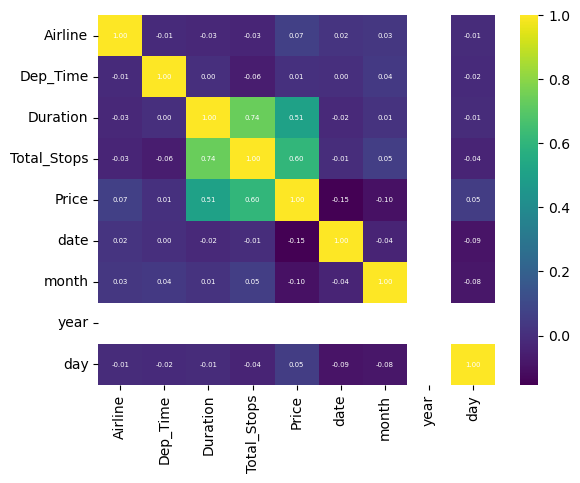

In [19]:
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 5, "color": "white"})

In [20]:
corr_matrix_abs = df.drop(columns='Price').corr().abs()

# Set the threshold for highly correlated features
threshold = 0.7

# List of highly correlated features
high_corr_features = np.where(corr_matrix_abs > threshold)
high_corr_pairs = [(corr_matrix_abs.index[x], corr_matrix_abs.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]
high_corr_pairs

[('Duration', 'Total_Stops')]

In [21]:
df = df.drop(columns=['Duration'])
X_df = df.drop(columns='Price')
y_df = df['Price']

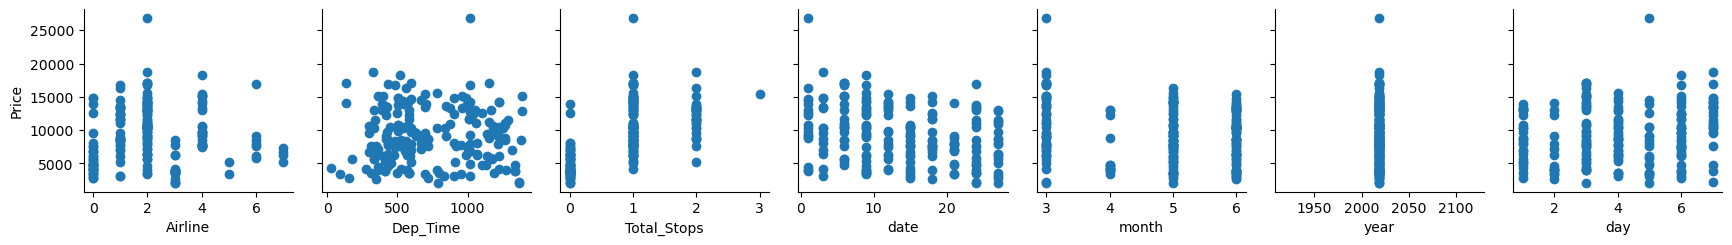

In [22]:
random_df = df.sample(n=200, random_state=10)
# random_df = df.copy()
grid = sns.PairGrid(data=random_df, y_vars=['Price'], x_vars=random_df.columns.drop(labels='Price'))
grid.map(plt.scatter)

In [23]:
def plt_time_dist(y, df, ylabel=None):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    if ylabel == None:
        ylabel = y
    # Create bar plots
    if 'hour' in df:
        sns.barplot(x='hour', y = y, data=df, errorbar=None, ax=axes[0, 0])
        axes[0, 0].set_xlabel('Hour')
        axes[0, 0].set_ylabel(ylabel)
    else:
        axes[0, 0].axis('off')
    if 'date' in df:
        sns.barplot(x='date', y = y, data=df, errorbar=None, ax=axes[0, 1])
        axes[0, 1].set_xlabel('Date')
        axes[0, 1].set_ylabel(ylabel)
    else:
        axes[0, 1].axis('off')
    if 'day' in df:
        sns.barplot(x='day', y = y, data=df, errorbar=None, ax=axes[1, 0])
        axes[1, 0].set_xlabel('Day')
        axes[1, 0].set_ylabel(ylabel)
    else:
        axes[1, 0].axis('off')
    if 'month' in df:
        sns.barplot(x='month', y = y, data=df, errorbar=None, ax=axes[1, 1])
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel(ylabel)
    else:
        axes[1, 1].axis('off')
    if 'year' in df:
        sns.barplot(x='year', y = y, data=df, errorbar=None, ax=axes[2, 0])
        axes[2, 0].set_xlabel('Year')
        axes[2, 0].set_ylabel(ylabel)
    else:
        axes[2, 0].axis('off')

    # Optionally add an empty plot in the last subplot if required
    axes[2, 1].axis('off')

    # Set the overall title for the entire figure
    fig.suptitle(f'{ylabel} by Hour, Date, Day, Month, and Year', fontsize=16)

    # Adjust layout to make room for the title
    plt.tight_layout()  # Adjust rect to leave space for the title
    plt.show()

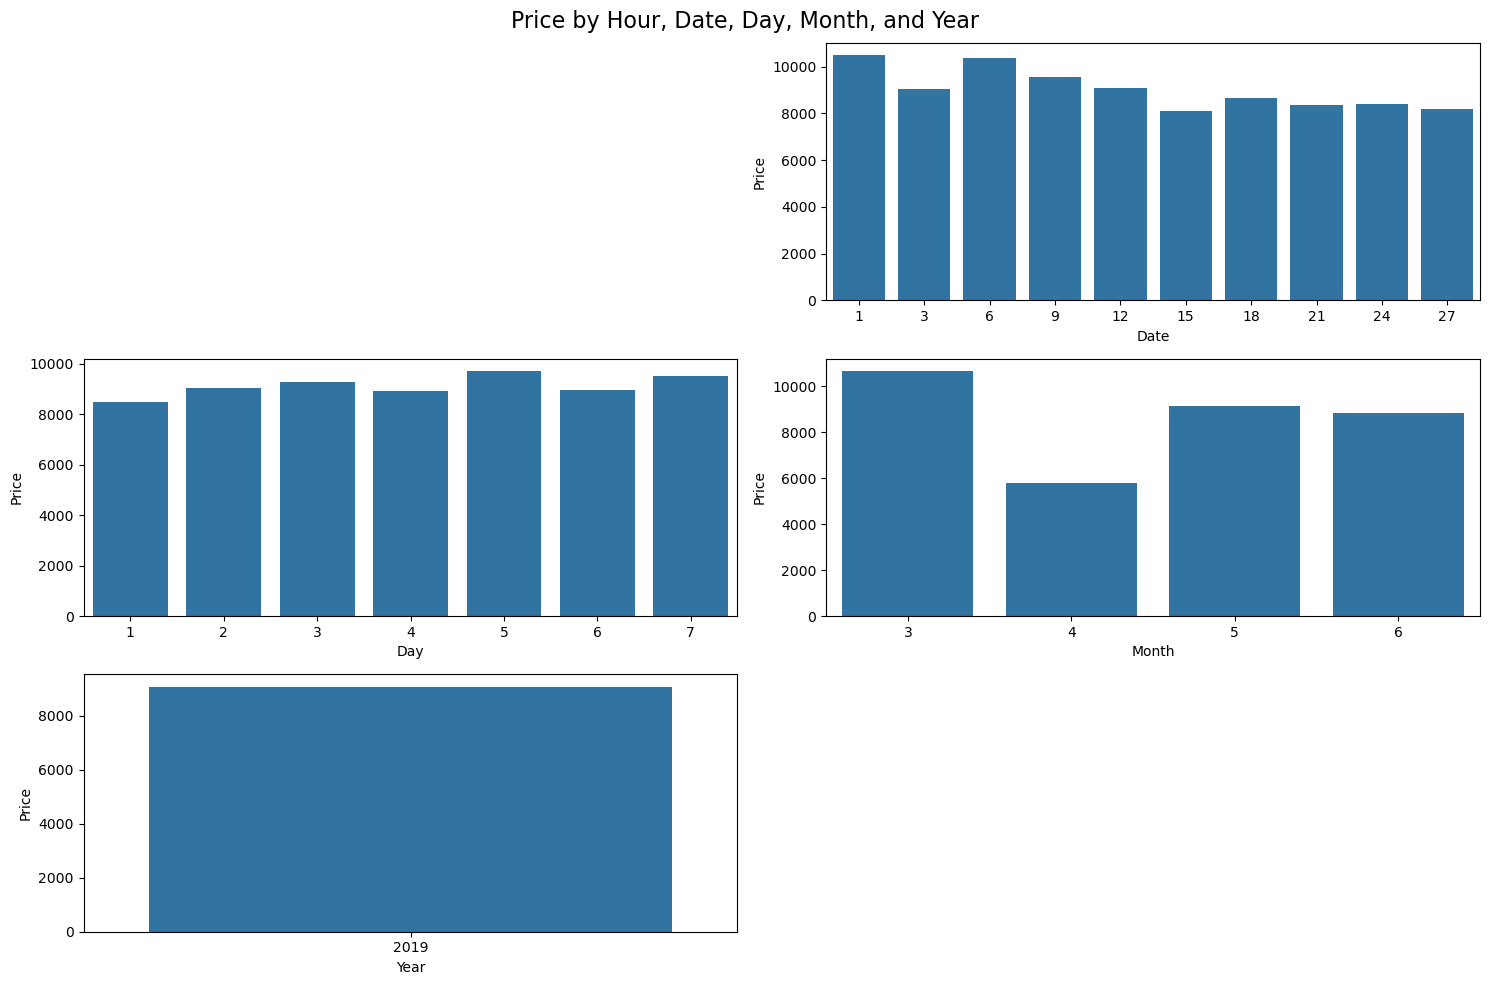

In [24]:
plt_time_dist(y='Price', df=df)

In [25]:
forest = RandomForestRegressor(n_estimators=100, random_state=1)
forest.fit(X_df, y_df)
importances = forest.feature_importances_
indices_desc = np.argsort(importances)[::-1]
importances = importances[indices_desc] / importances.max()
imp_features_desc = X_df.columns[indices_desc]

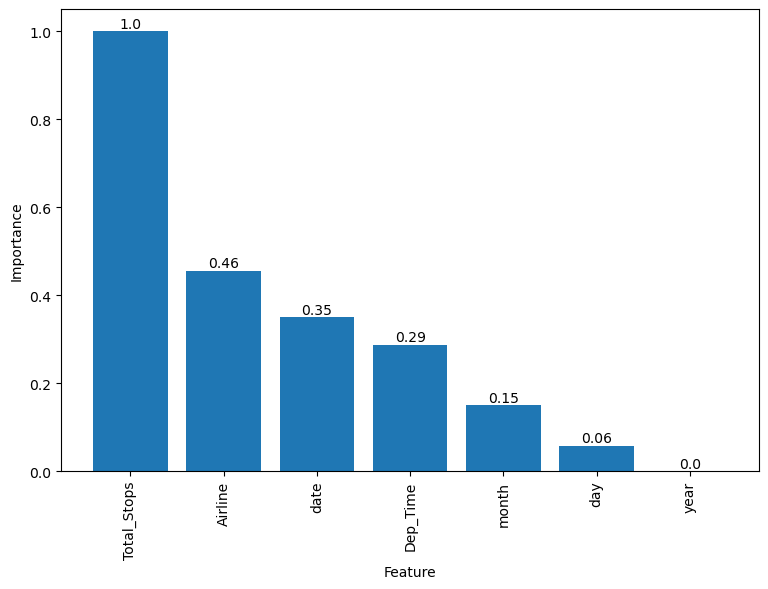

In [26]:
int_idx = np.arange(indices_desc.shape[0])
plt.figure(figsize=(9, 6))
bars = plt.bar(int_idx, importances)
bar_idx = 0
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, round(yval, 2), ha='center', va='bottom', fontsize=10)
    bar_idx += 1
plt.xticks(int_idx, imp_features_desc, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [27]:
airline_ohe = pd.get_dummies(X_df['Airline'], drop_first=True).astype(int)
X_df = pd.concat([X_df, airline_ohe], axis=1)
X_df.head()

,Airline,Dep_Time,Total_Stops,date,month,year,day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,0.0,1340,0.0,24,3,2019,7,0,0,0,0,0,0,0,0,0,0,0
1,1.0,350,2.0,1,5,2019,3,1,0,0,0,0,0,0,0,0,0,0
2,2.0,565,2.0,9,6,2019,7,0,1,0,0,0,0,0,0,0,0,0
3,0.0,1085,1.0,12,5,2019,7,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1010,1.0,1,3,2019,5,0,0,0,0,0,0,0,0,0,0,0


In [28]:
X_df.drop(columns='Airline', inplace=True)

In [29]:
X_df.columns

Index([   'Dep_Time', 'Total_Stops',        'date',       'month',
              'year',         'day',           1.0,           2.0,
                 3.0,           4.0,           5.0,           6.0,
                 7.0,           8.0,           9.0,          10.0,
                11.0],
      dtype='object')

In [30]:
X_df.columns = X_df.columns.astype(str)
X_df.columns

Index(['Dep_Time', 'Total_Stops', 'date', 'month', 'year', 'day', '1.0', '2.0',
       '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0'],
      dtype='object')

In [31]:
# Sorting features with decreasing importance
X_df = X_df[['Total_Stops', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', 'date', 'Dep_Time', 'month', 'day', 'year']]
X_df.head()

,Total_Stops,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,date,Dep_Time,month,day,year
0,0.0,0,0,0,0,0,0,0,0,0,0,0,24,1340,3,7,2019
1,2.0,1,0,0,0,0,0,0,0,0,0,0,1,350,5,3,2019
2,2.0,0,1,0,0,0,0,0,0,0,0,0,9,565,6,7,2019
3,1.0,0,0,0,0,0,0,0,0,0,0,0,12,1085,5,7,2019
4,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1010,3,5,2019


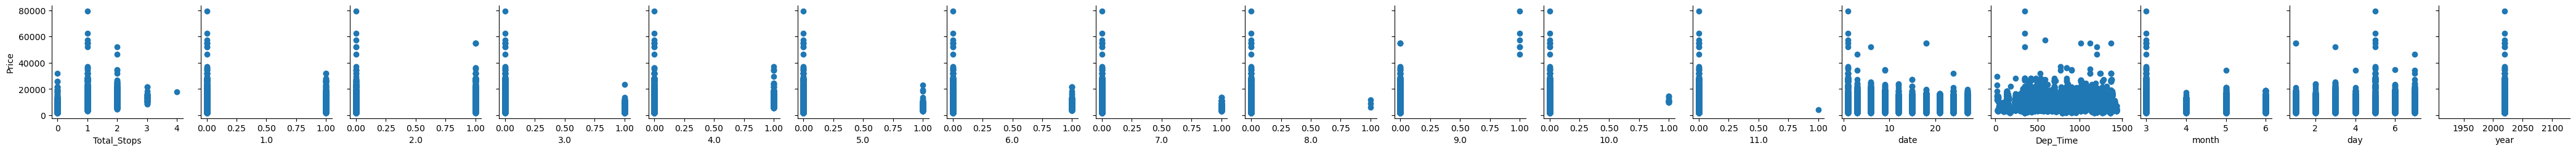

In [32]:
random_df2 = X_df.sample(n=X_df.shape[0], random_state=10)
random_df2 = pd.concat([random_df2, y_df], axis=1)
grid = sns.PairGrid(data=random_df2, y_vars=['Price'], x_vars=random_df2.columns.drop(labels='Price'))
grid.map(plt.scatter)
plt.show()

In [33]:
subset_results = []
ft_to_rem = 5
mm = MinMaxScaler()
sample_size = X_df.shape[0]
np.random.seed(42)
random_samples = np.random.choice(X_df.index, size=sample_size, replace=False)
X_df_sampled = X_df.loc[random_samples]
y_df_sampled = y_df.loc[random_samples]
X_main_df, X_test_df, y_main_df, y_test_df = train_test_split(X_df_sampled, y_df_sampled, test_size=0.2, random_state=11)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_main_df, y_main_df, test_size=0.2, random_state=42)
mm.fit(X_train_df)
X_train = mm.transform(X_train_df)
y_train = y_train_df.values
X_val = mm.transform(X_val_df)
y_val = y_val_df.values
X_test = mm.transform(X_test_df)
y_test = y_test_df.values
k = int(np.floor(np.sqrt(X_train.shape[0])))
knn = KNeighborsRegressor(n_neighbors=k)
for i in range(0, ft_to_rem+1):
    if i > 0:
        X_train_filtered = X_train[:, :-i]
        X_val_filtered = X_val[:, :-i]
    else:
        X_train_filtered = X_train
        X_val_filtered = X_val
    knn.fit(X_train_filtered, y_train)
    # Make predictions
    y_pred = knn.predict(X_val_filtered)

    # Evaluate the model
    mse = round(mean_squared_error(y_val, y_pred), 2)
    mape = round(np.mean(np.abs((y_val - y_pred) / y_val)) * 100, 2)
    subset_results.append({
        'features_dropped': i,
        'val_mse': mse,
        'val_mape': mape
    })
    print(f'Trial #{i}\n')
    print(f'Features Dropped: {i}')
    print(f"Validation Mean Squared Error: {mse}")
    print(f"Validation MAPE: {mape}%\n\n")

subset_results = sorted(subset_results, key=lambda x: (x['val_mse'], -x['features_dropped']))
print('Best Subset')
print(f"Features Dropped: {subset_results[0]['features_dropped']}")
print(f"Dropped Feature Names: {list(X_df.columns[-subset_results[0]['features_dropped']:])}")
print(f"Validation Mean Squared Error: {subset_results[0]['val_mse']}")
print(f"Validation MAPE: {subset_results[0]['val_mape']}%\n\n")

X_main_df, X_test_df, y_main_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=11)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_main_df, y_main_df, test_size=0.2, random_state=42)
mm.fit(X_train_df)
X_train = mm.transform(X_train_df)
y_train = y_train_df.values
X_val = mm.transform(X_val_df)
y_val = y_val_df.values
X_test = mm.transform(X_test_df)
y_test = y_test_df.values
X_test_filtered = X_test[:, :-subset_results[0]['features_dropped']]
X_train_filtered = X_train[:, :-subset_results[0]['features_dropped']]
X_val_filtered = X_val[:, :-subset_results[0]['features_dropped']]

Trial #0

Features Dropped: 0
Validation Mean Squared Error: 8807982.76
Validation MAPE: 26.38%


Trial #1

Features Dropped: 1
Validation Mean Squared Error: 8807982.76
Validation MAPE: 26.38%


Trial #2

Features Dropped: 2
Validation Mean Squared Error: 8609936.79
Validation MAPE: 25.59%


Trial #3

Features Dropped: 3
Validation Mean Squared Error: 9894224.49
Validation MAPE: 24.91%


Trial #4

Features Dropped: 4
Validation Mean Squared Error: 9660860.16
Validation MAPE: 23.72%


Trial #5

Features Dropped: 5
Validation Mean Squared Error: 9995625.07
Validation MAPE: 23.24%


Best Subset
Features Dropped: 2
Dropped Feature Names: ['day', 'year']
Validation Mean Squared Error: 8609936.79
Validation MAPE: 25.59%




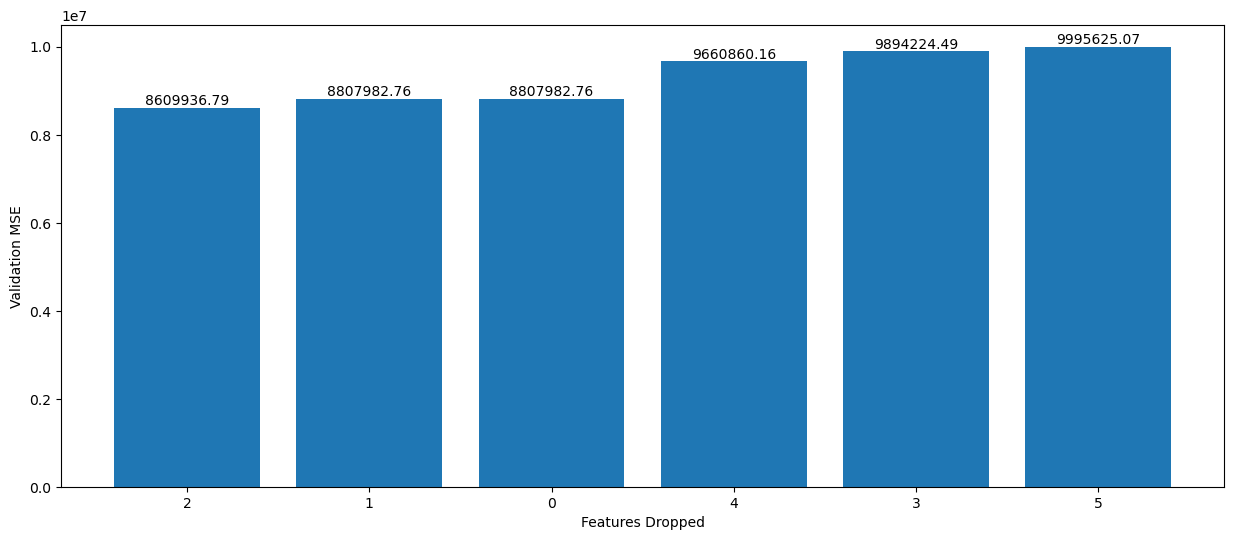

In [34]:
val_mse = map(lambda x: x['val_mse'], subset_results)
val_mse = list(val_mse)
ft_dropped = map(lambda x: x['features_dropped'], subset_results)
ft_dropped = list(ft_dropped)
idx = np.arange(0, len(subset_results))
plt.figure(figsize=(15, 6))
bars = plt.bar(idx, val_mse)
plt.xlabel('Features Dropped')
plt.ylabel('Validation MSE')
plt.xticks(idx, ft_dropped)
# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()

### Exporting dataset for training

In [36]:
file = open('X_train_filtered', 'wb') 
pickle.dump(X_train_filtered, file) 
file.close()

file = open('X_val_filtered', 'wb') 
pickle.dump(X_val_filtered, file) 
file.close()

file = open('y_train', 'wb') 
pickle.dump(y_train, file) 
file.close()

file = open('y_val', 'wb') 
pickle.dump(y_val, file) 
file.close()

### Start off with shallow NN with 1 hidden layer

In [37]:
with open('models1', 'rb') as file:
     models1 = pickle.load(file)
models1

[{'model': <Sequential name=sequential_13, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [32],
  'learning_rate': 1.0,
  'regularization_lambda': 0.1,
  'batch_norm': 'yes',
  'training_loss': 5590965.0,
  'val_loss': 5202387.5},
 {'model': <Sequential name=sequential_65, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [16],
  'learning_rate': 1.0,
  'regularization_lambda': 0.01,
  'batch_norm': 'yes',
  'training_loss': 5598953.5,
  'val_loss': 5357455.5},
 {'model': <Sequential name=sequential_35, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24],
  'learning_rate': 1.0,
  'regularization_lambda': 1.0,
  'batch_norm': 'yes',
  'training_loss': 5687506.5,
  'val_loss': 5364310.0},
 {'model': <Sequential name=sequential_23, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [32],
  'learning_rate': 1.0,
  'regularization_lambda': 0.0001,
  'batch_norm': 'yes',
  'training_loss': 5813349.5,
  'val_loss': 5403519.0},
 {'model': <Sequ

### Analyzing Top 10 Models

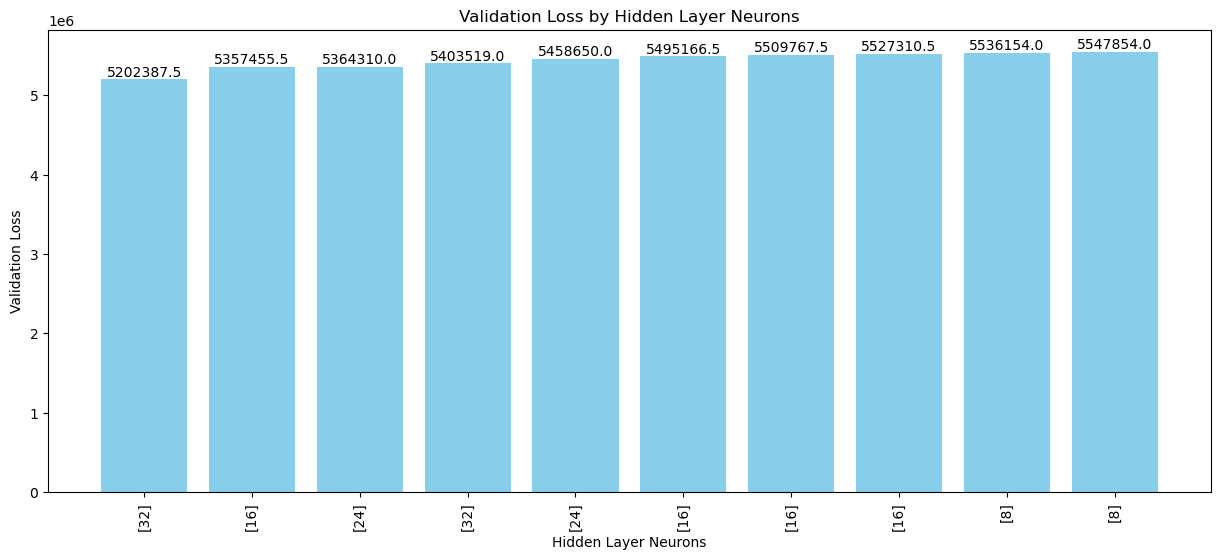

In [38]:
val_loss = map(lambda x: x['val_loss'], models1)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models1)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Let's make a moderately complex NN with 2 hidden layers

In [39]:
with open('models2', 'rb') as file:
     models2 = pickle.load(file)
models2

[{'model': <Sequential name=sequential_100, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [32, 32],
  'learning_rate': 1.0,
  'regularization_lambda': 0.1,
  'batch_norm': 'no',
  'training_loss': 5561230.5,
  'val_loss': 5133916.5},
 {'model': <Sequential name=sequential_198, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [8, 8],
  'learning_rate': 1.0,
  'regularization_lambda': 0.01,
  'batch_norm': 'yes',
  'training_loss': 5789245.5,
  'val_loss': 5216248.0},
 {'model': <Sequential name=sequential_179, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'yes',
  'training_loss': 5466570.5,
  'val_loss': 5243284.0},
 {'model': <Sequential name=sequential_107, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [32, 32],
  'learning_rate': 1.0,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 5445017.0,
  'val_loss': 5278763.0

### Analyzing Top 10 Models

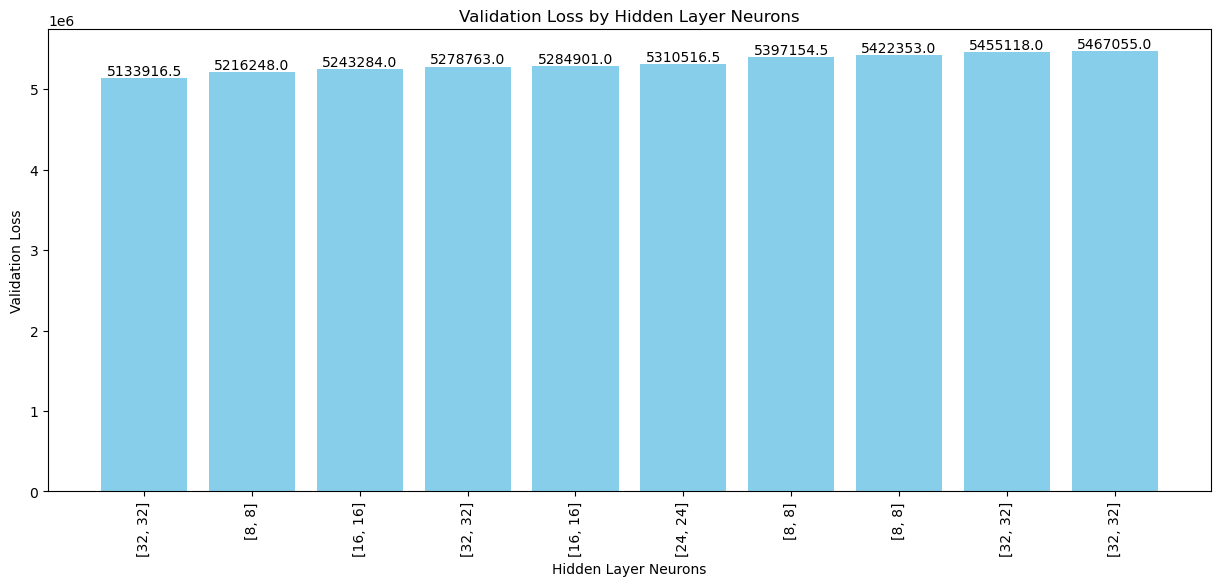

In [40]:
val_loss = map(lambda x: x['val_loss'], models2)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models2)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Let's make a Deep NN with 3 hidden layers

In [41]:
with open('models3', 'rb') as file:
     models3 = pickle.load(file)
models3

[{'model': <Sequential name=sequential_23, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [32, 32, 32],
  'learning_rate': 0.01,
  'regularization_lambda': 0.1,
  'batch_norm': 'yes',
  'training_loss': 5110741.5,
  'val_loss': 4730972.0},
 {'model': <Sequential name=sequential_61, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [24, 24, 24],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0001,
  'batch_norm': 'yes',
  'training_loss': 5210371.0,
  'val_loss': 4813095.0},
 {'model': <Sequential name=sequential_86, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [16, 16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.001,
  'batch_norm': 'yes',
  'training_loss': 5339349.0,
  'val_loss': 4944693.5},
 {'model': <Sequential name=sequential_55, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [24, 24, 24],
  'learning_rate': 0.01,
  'regularization_lambda': 0.01,
  'batch_norm': 'yes',
  'training_loss': 5240119.0,
  'va

### Analyzing Top 10 Models

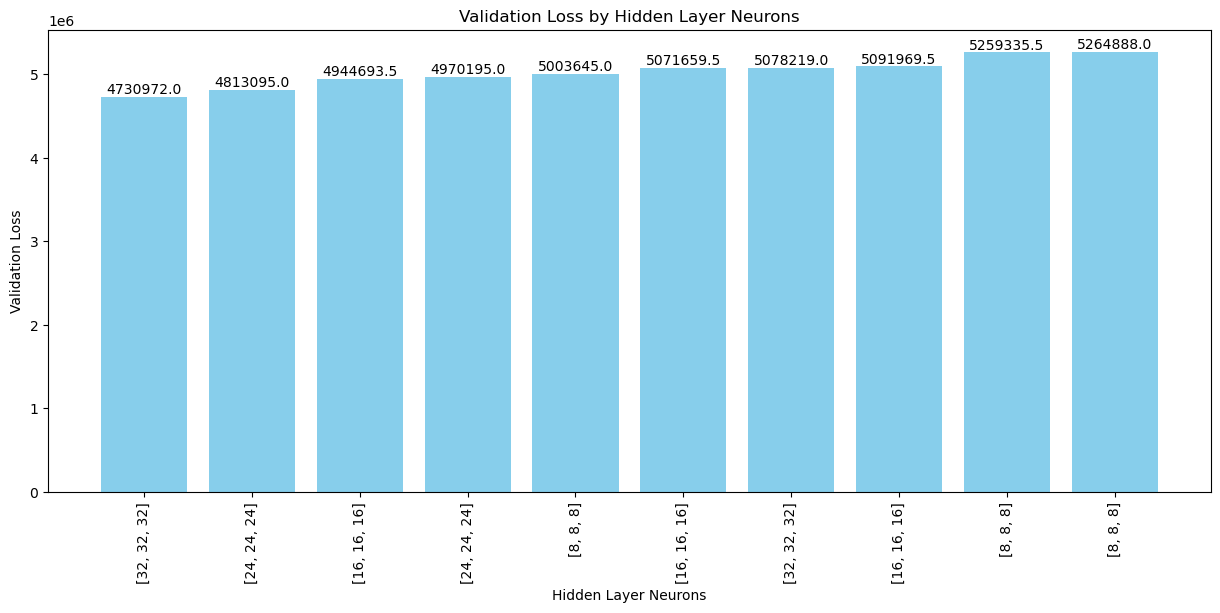

In [42]:
val_loss = map(lambda x: x['val_loss'], models3)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models3)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

In [43]:
models_combined = models1 + models2 + models3
models_combined = sorted(models_combined, key=lambda x: x['val_loss'])
val_loss_combined = map(lambda x: x['val_loss'], models_combined)
val_loss_combined = list(val_loss_combined)
val_loss_combined_rel = np.array(val_loss_combined) / val_loss_combined[0] * 100
val_loss_combined_neurons = list(map(lambda x: x['hidden_layer_neurons'], models_combined))

### Analyzing Top 10 Combined Models

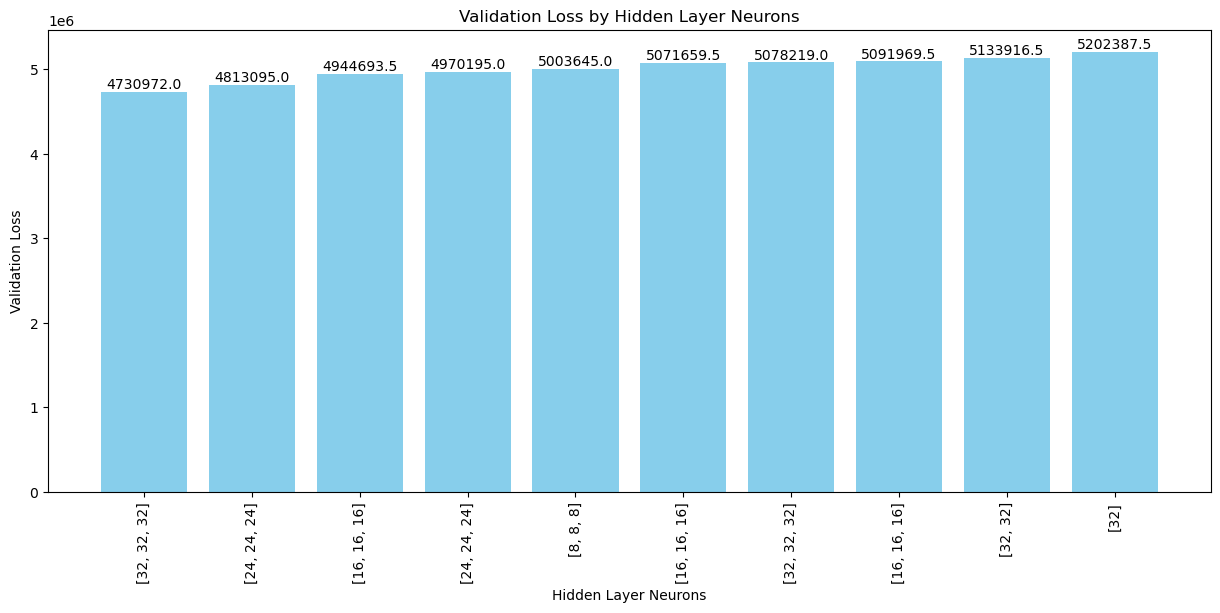

In [44]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Analyzing Relative Loss of Top 10 Combined Models

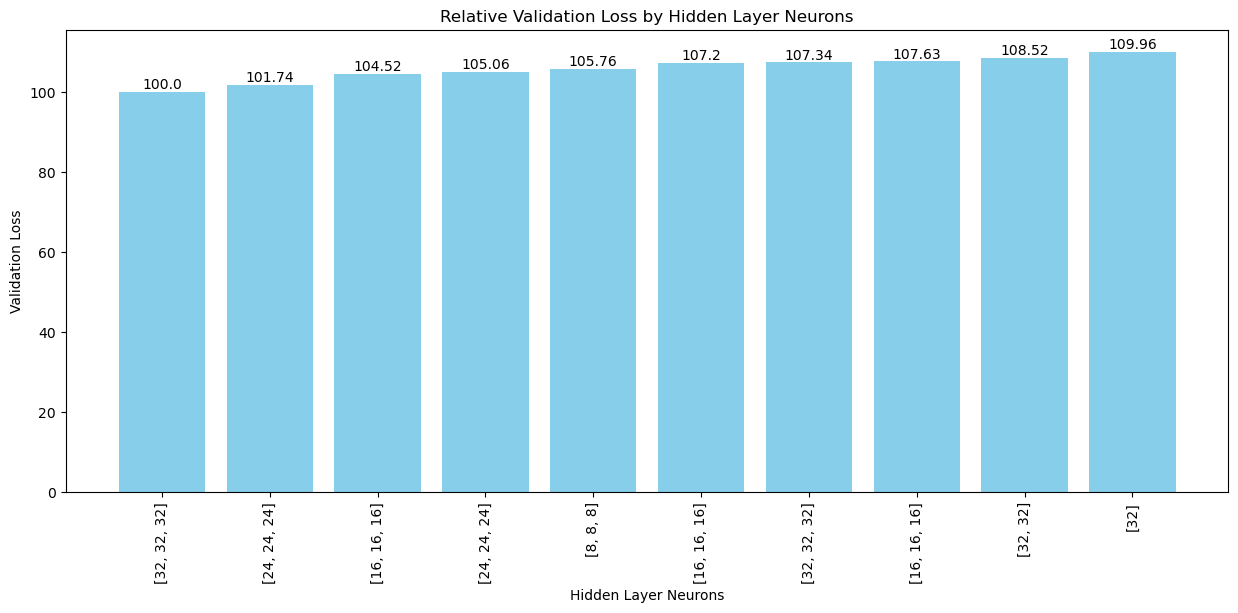

In [45]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined_rel[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Relative Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Since, 3 hidden layers perform better. Let's dig deeper!

In [46]:
with open('models4', 'rb') as file:
     models4 = pickle.load(file)
models4

[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [32, 32, 32, 32],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0001,
  'batch_norm': 'yes',
  'training_loss': 4873561.5,
  'val_loss': 4611173.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [24, 24, 24, 24],
  'learning_rate': 0.01,
  'regularization_lambda': 1.0,
  'batch_norm': 'yes',
  'training_loss': 4936208.5,
  'val_loss': 4744625.0},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [16, 16, 16, 16],
  'learning_rate': 0.01,
  'regularization_lambda': 0.01,
  'batch_norm': 'yes',
  'training_loss': 5234740.5,
  'val_loss': 4781630.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [16, 16, 16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.001,
  'batch_norm': 'yes',
  'training_loss': 5198020.5,
 

### Analyzing Top 10 Models

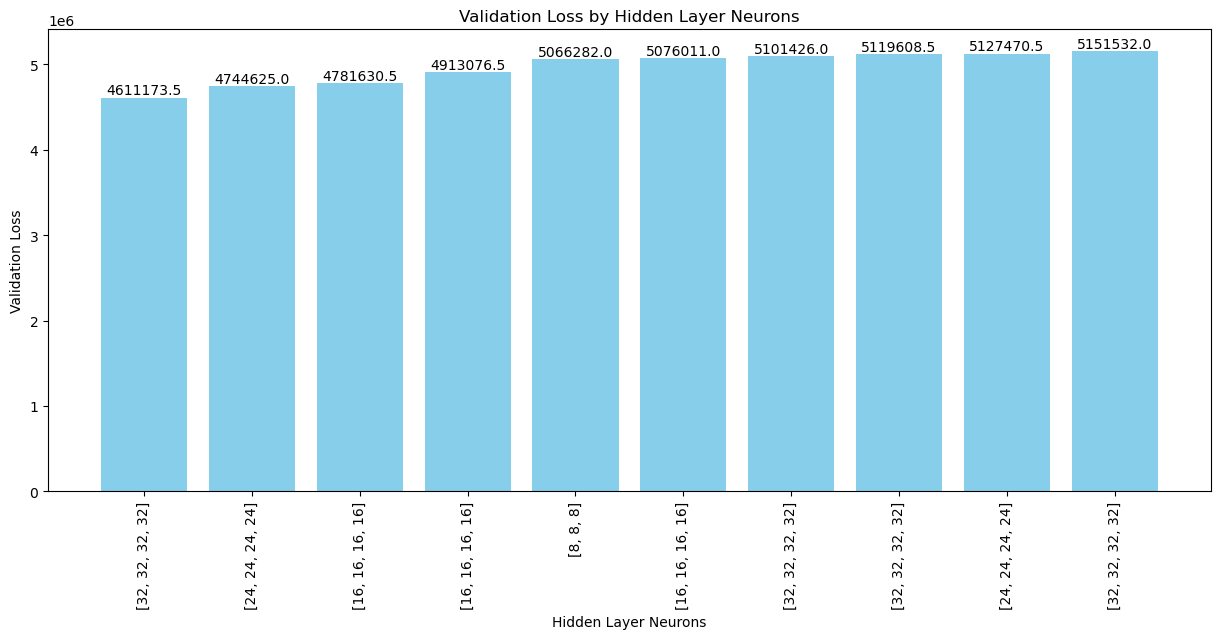

In [47]:
val_loss = map(lambda x: x['val_loss'], models4)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models4)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

In [48]:
models_combined = models_combined + models4
models_combined = sorted(models_combined, key=lambda x: x['val_loss'])
val_loss_combined = map(lambda x: x['val_loss'], models_combined)
val_loss_combined = list(val_loss_combined)
val_loss_combined_rel = np.array(val_loss_combined) / val_loss_combined[0] * 100
val_loss_combined_neurons = list(map(lambda x: x['hidden_layer_neurons'], models_combined))

### Analyzing Top 10 Combined Models

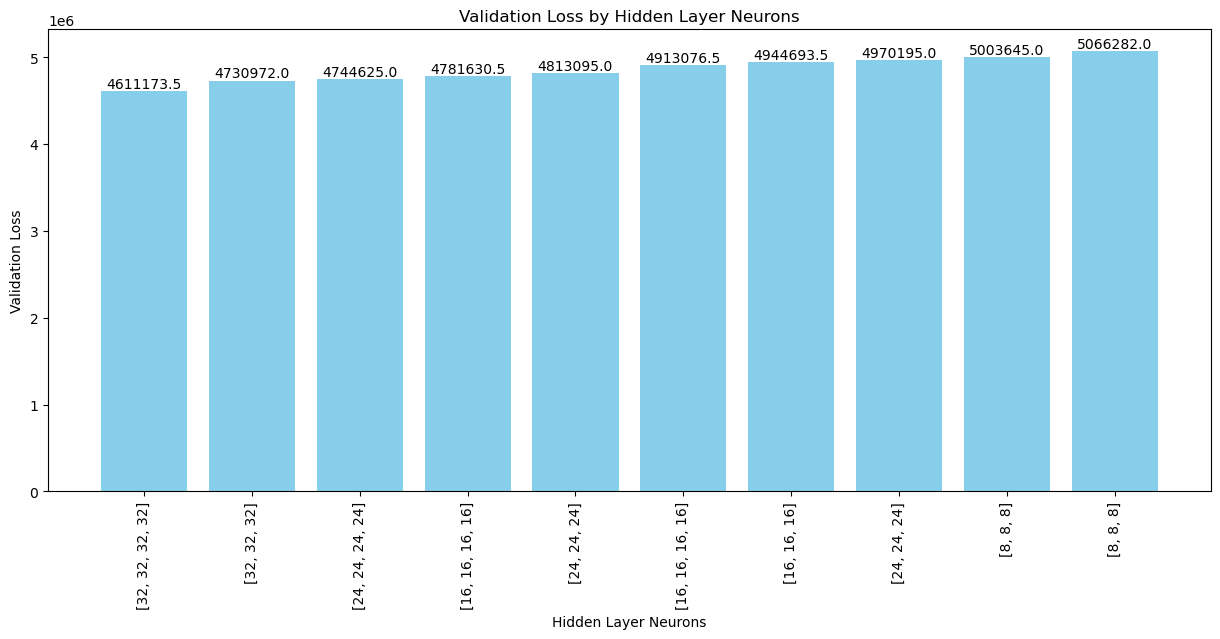

In [49]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Analyzing Relative Loss of Top 10 Combined Models

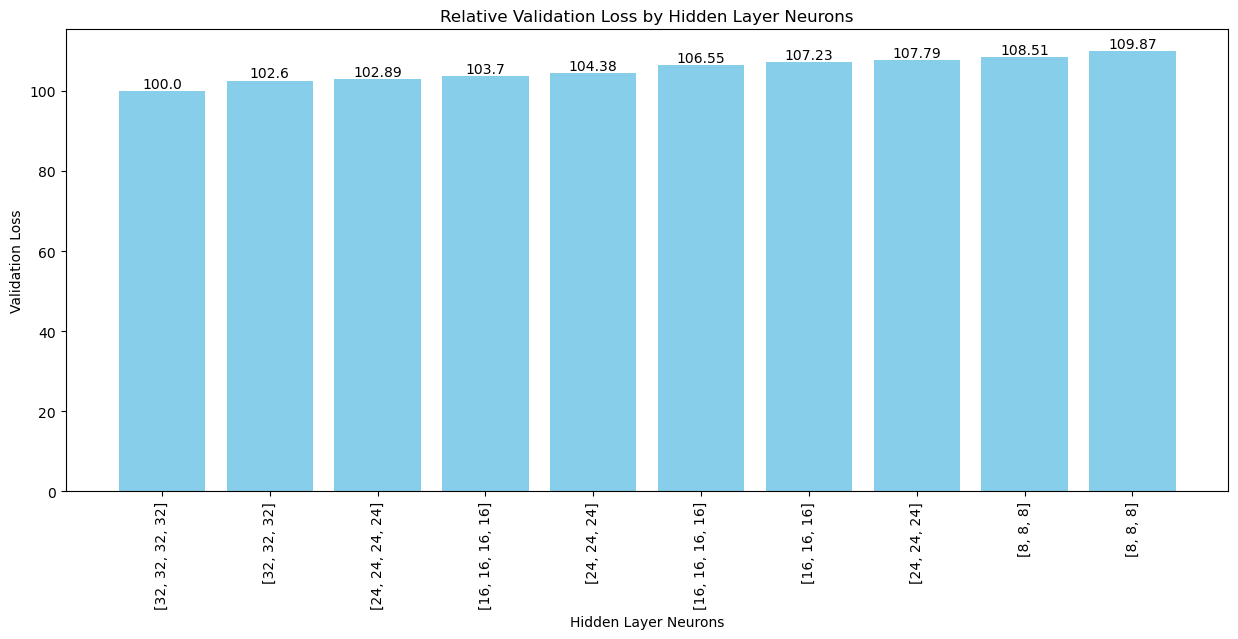

In [50]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined_rel[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Relative Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Let's make NNs with 5 hidden layers

In [51]:
with open('models5', 'rb') as file:
     models5 = pickle.load(file)
models5

[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 5,
  'hidden_layer_neurons': [32, 32, 32, 32, 32],
  'learning_rate': 0.01,
  'regularization_lambda': 0.1,
  'batch_norm': 'yes',
  'training_loss': 4877834.5,
  'val_loss': 4649578.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 5,
  'hidden_layer_neurons': [16, 16, 16, 16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'yes',
  'training_loss': 5279924.0,
  'val_loss': 4886229.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [8, 8, 8, 8],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'yes',
  'training_loss': 5404002.5,
  'val_loss': 4903334.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 5,
  'hidden_layer_neurons': [24, 24, 24, 24, 24],
  'learning_rate': 1.0,
  'regularization_lambda': 0.01,
  'batch_norm': 'yes',
  'training_loss': 53414

### Analyzing Top 10 Models

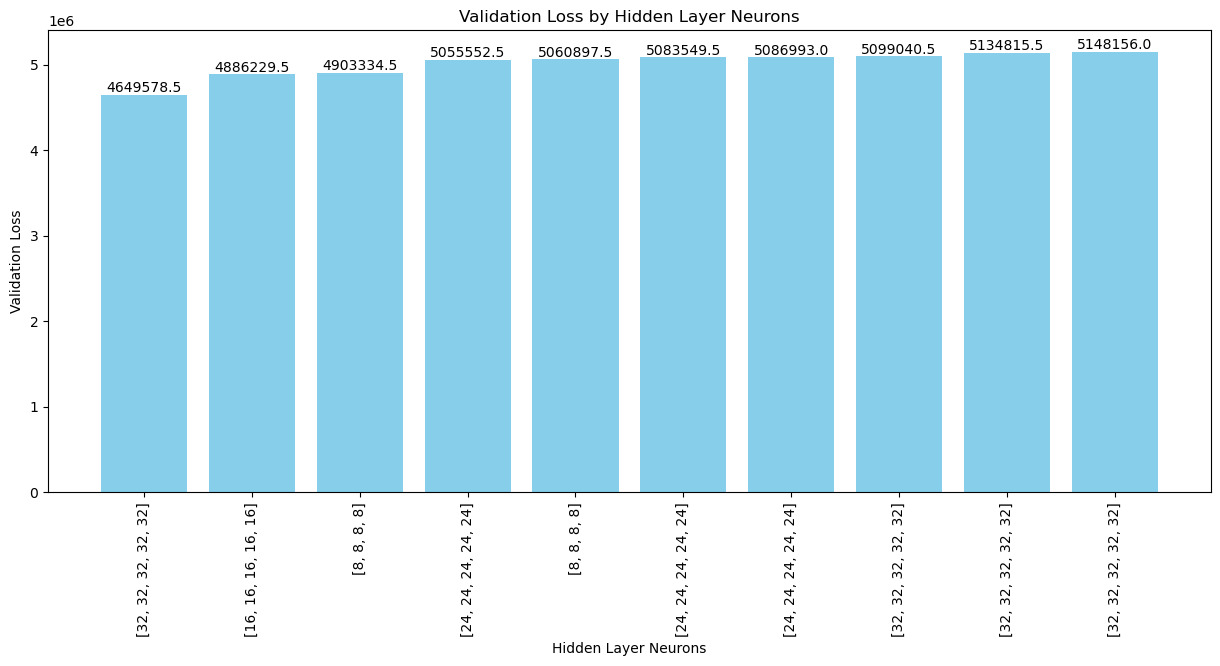

In [52]:
val_loss = map(lambda x: x['val_loss'], models5)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models5)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

In [53]:
models_combined = models_combined + models5
models_combined = sorted(models_combined, key=lambda x: x['val_loss'])
val_loss_combined = map(lambda x: x['val_loss'], models_combined)
val_loss_combined = list(val_loss_combined)
val_loss_combined_rel = np.array(val_loss_combined) / val_loss_combined[0] * 100
val_loss_combined_neurons = list(map(lambda x: x['hidden_layer_neurons'], models_combined))

### Analyzing Top 10 Combined Models

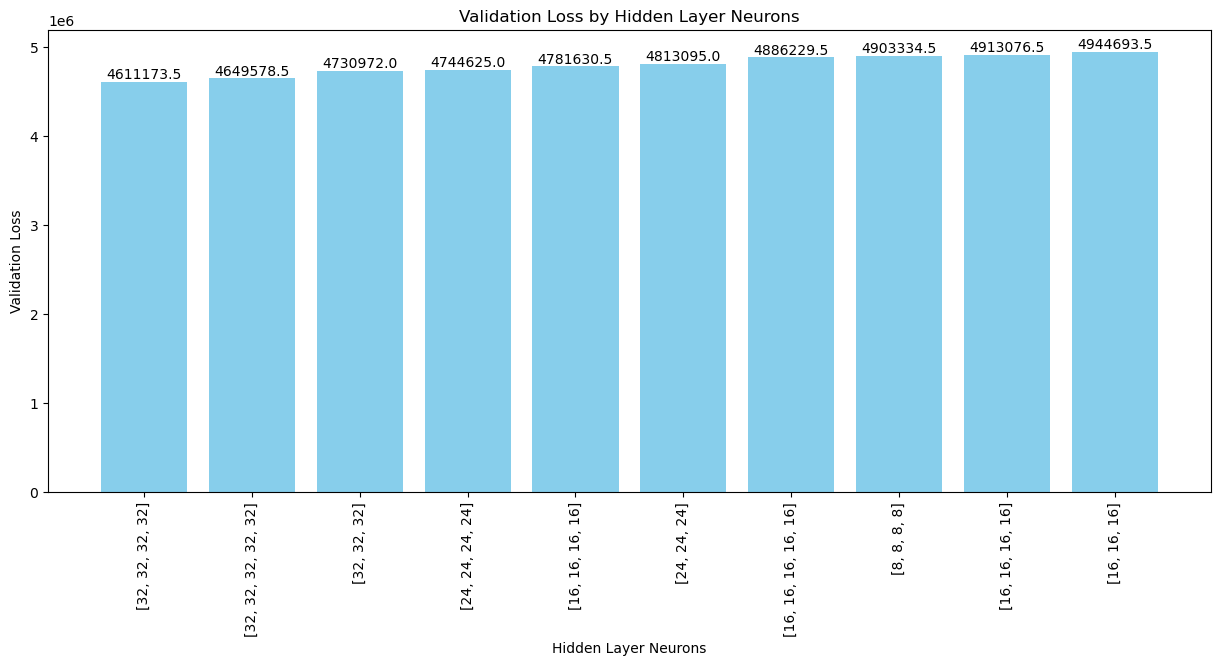

In [54]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Analyzing Relative Loss of Top 10 Combined Models

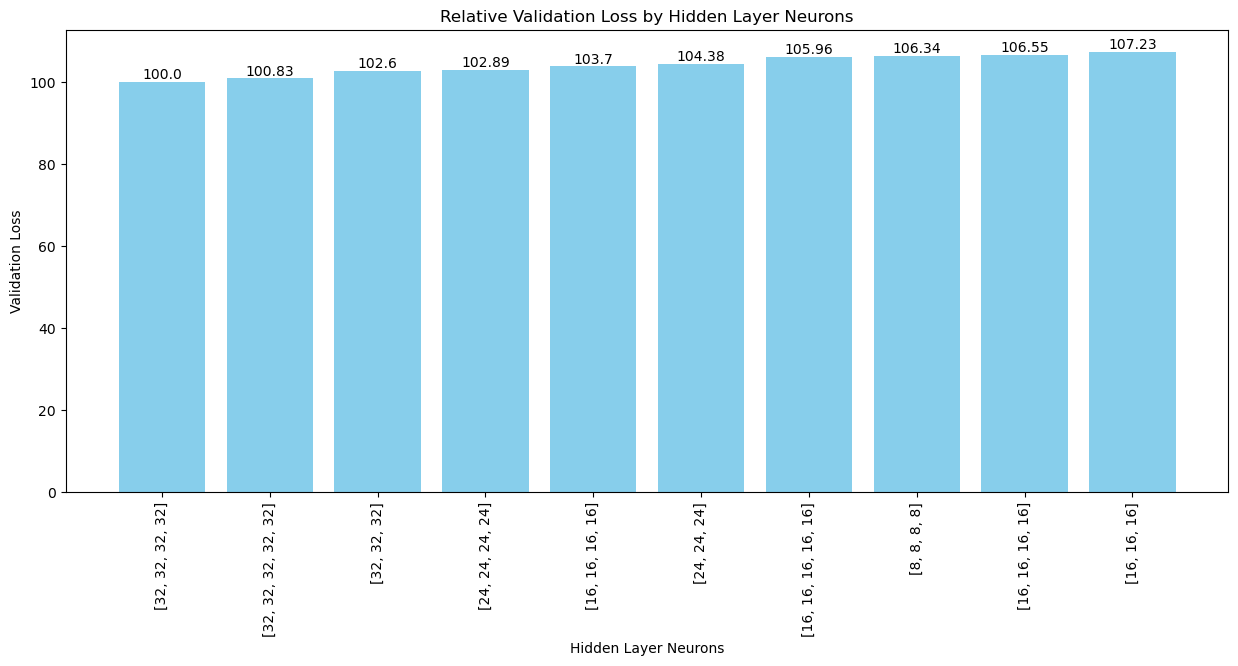

In [55]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined_rel[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Relative Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

#### Turns out NN with 4 hidden layers and 32 neurons is optimal. Let's increase the number of neurons to see if there's any imrovement in the performance.

In [56]:
with open('models4_2', 'rb') as file:
    models4_2 = pickle.load(file)
models4_2

[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [64, 64, 64, 64],
  'learning_rate': 0.1,
  'regularization_lambda': 1.0,
  'batch_norm': 'no',
  'training_loss': 5245412.0,
  'val_loss': 5051545.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [64, 64, 64, 64],
  'learning_rate': 0.1,
  'regularization_lambda': 0.01,
  'batch_norm': 'no',
  'training_loss': 5134226.5,
  'val_loss': 5085884.0},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [64, 64, 64, 64],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 5654285.5,
  'val_loss': 5111400.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [64, 64, 64, 64],
  'learning_rate': 0.01,
  'regularization_lambda': 0.1,
  'batch_norm': 'no',
  'training_loss': 5706262.0,
  'val_l

In [57]:
models_combined = models_combined + models4_2
models_combined = sorted(models_combined, key=lambda x: x['val_loss'])
val_loss_combined = map(lambda x: x['val_loss'], models_combined)
val_loss_combined = list(val_loss_combined)
val_loss_combined_rel = np.array(val_loss_combined) / val_loss_combined[0] * 100
val_loss_combined_neurons = list(map(lambda x: x['hidden_layer_neurons'], models_combined))

### Analyzing Top 10 Combined Models

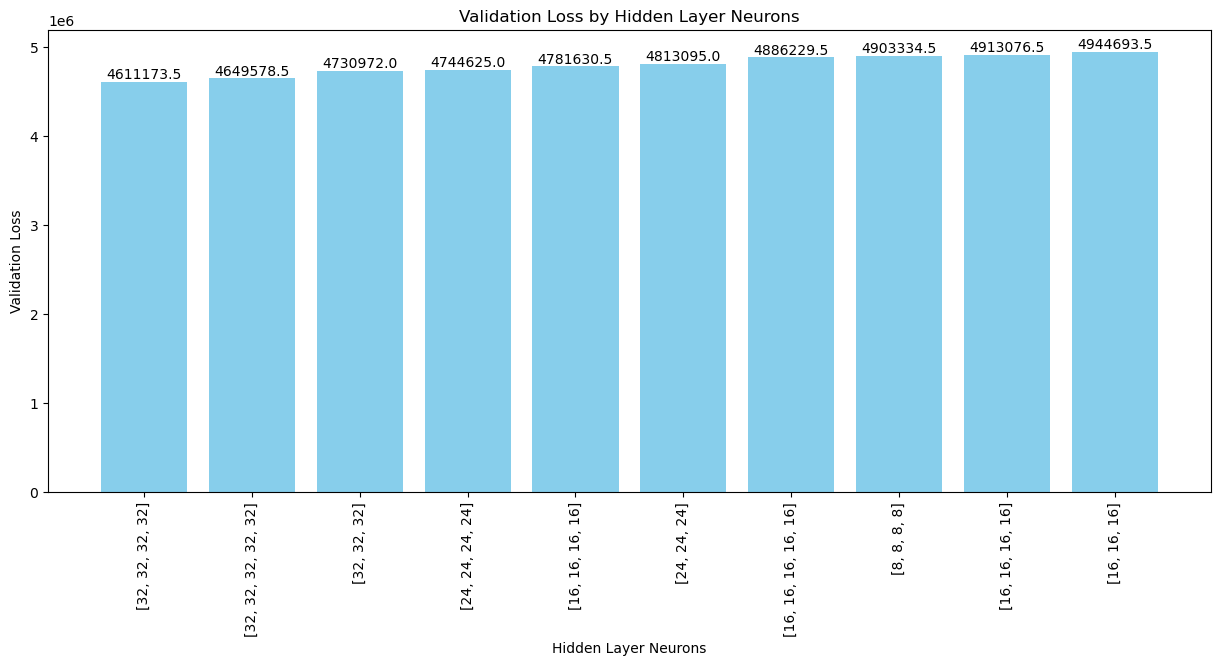

In [58]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Turns out 32 neurons are most optimal. Let's see if we can reduce the number of neurons in subsequent hidden layers.

In [59]:
with open('models4_3', 'rb') as file:
    models4_3 = pickle.load(file)
models4_3

[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [32, 16, 8, 4],
  'learning_rate': 1.0,
  'regularization_lambda': 0.01,
  'batch_norm': 'yes',
  'training_loss': 5405648.5,
  'val_loss': 5001300.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [32, 16, 8, 4],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'yes',
  'training_loss': 5535144.5,
  'val_loss': 5162729.0},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [32, 16, 8, 4],
  'learning_rate': 1.0,
  'regularization_lambda': 0.001,
  'batch_norm': 'yes',
  'training_loss': 5652781.5,
  'val_loss': 5216885.5},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 4,
  'hidden_layer_neurons': [32, 16, 8, 4],
  'learning_rate': 0.1,
  'regularization_lambda': 0.1,
  'batch_norm': 'no',
  'training_loss': 6076387.0,
  'val_loss':

In [60]:
models_combined = models_combined + models4_3
models_combined = sorted(models_combined, key=lambda x: x['val_loss'])
val_loss_combined = map(lambda x: x['val_loss'], models_combined)
val_loss_combined = list(val_loss_combined)
val_loss_combined_rel = np.array(val_loss_combined) / val_loss_combined[0] * 100
val_loss_combined_neurons = list(map(lambda x: x['hidden_layer_neurons'], models_combined))

### Analyzing Top 10 Combined Models

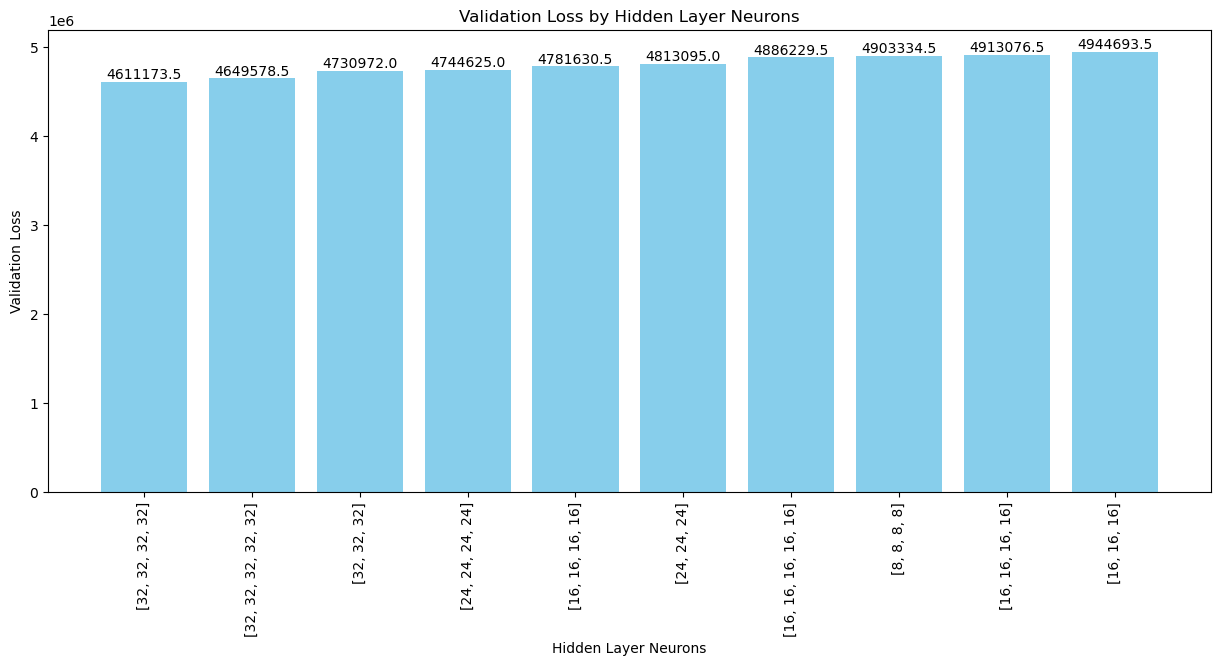

In [61]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Analyzing Relative Loss of Top 10 Combined Models

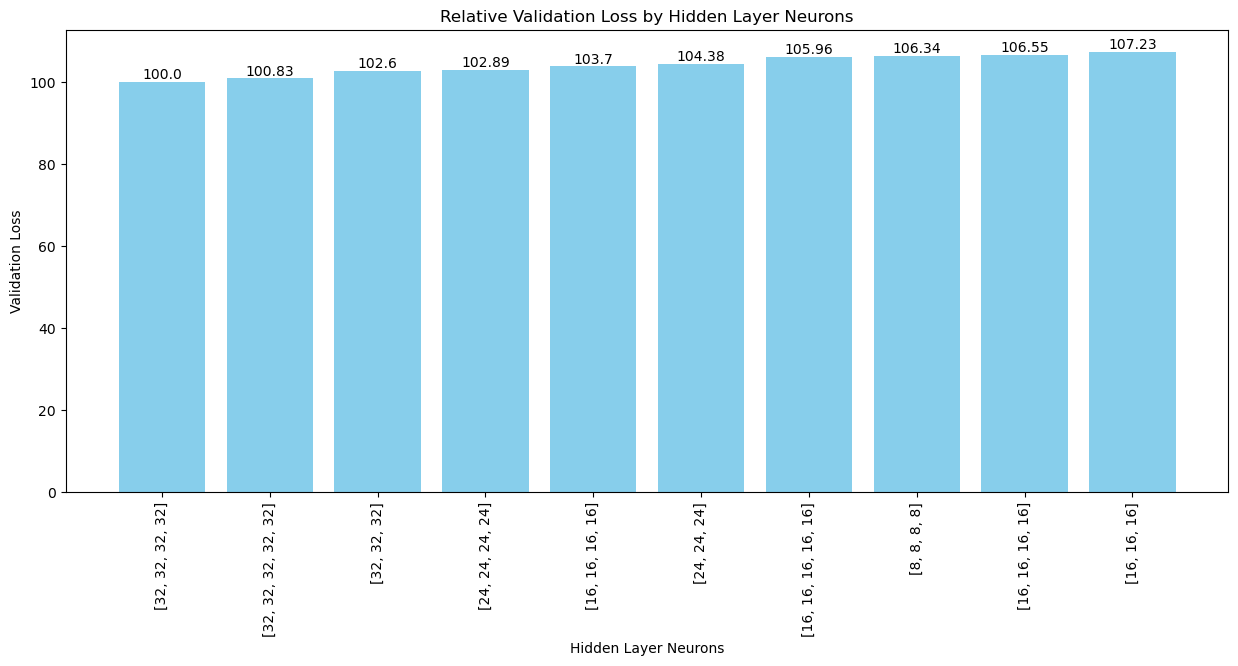

In [62]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined_rel[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Relative Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

#### The NN with four hidden layers and 32 neurons per layer is most suitable! Let's increase the number of epochs for this model with same hyperparameters.

In [373]:
class Tuner(Callback):
    def __init__(self, monitor, early_stopping=False, patience=5, restore_best_weights=False, lr_decay=False, lr_decay_rate=0.95):
        super(Tuner, self).__init__()
        self.best_val = float('inf')
        self.monitor = monitor
        self.best_epoch = None
        self.best_weights = None
        self.final_model_training_loss = float('inf')
        self.patience_counter = 0
        self.last_training_loss = float('inf')
        self.early_stopping = early_stopping
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.lr_decay = lr_decay
        self.lr_decay_rate=lr_decay_rate

    def decay_lr(self):
        lr = self.model.optimizer.learning_rate.numpy()
        lr *= self.lr_decay_rate
        self.model.optimizer.learning_rate.assign(lr)

    def on_epoch_end(self, epoch, logs=None):
        if self.early_stopping:
            if abs(self.last_training_loss - logs.get('loss')) < 0.001:
                self.patience_counter += 1
                if self.patience_counter == self.patience:
                    self.model.stop_training = True
                    if self.restore_best_weights:
                        self.model.set_weights(self.best_weights)
                        print(f'Early Stopping Triggered at Epoch #{epoch+1}')
                        print(f'\nRestoring Best Weights From Epoch: {self.best_epoch+1}\n')
                        print(f'Selected model {self.monitor}: {self.best_val}')
                        print(f'Selected model training loss: {self.final_model_training_loss}\n\n')
                    else:
                        print(f'Early Stopping Triggered at Epoch #{epoch+1}')
                        print(f"Training Loss: {logs.get('loss')}")
                        print(f"Validation Loss: {logs.get('val_loss')}\n\n")
            else:
                self.patience_counter = 0
        if self.lr_decay:
            self.decay_lr()
        current_val = logs.get(self.monitor)
        if current_val < self.best_val:
            self.best_val = current_val
            self.best_epoch = epoch
            self.best_weights = self.model.get_weights()
            self.final_model_training_loss = logs.get('loss')
            self.final_model_val_loss = logs.get('val_loss')
        self.last_training_loss = logs.get('loss')
        if epoch == self.params['epochs']-1:
            if self.restore_best_weights:
                self.model.set_weights(self.best_weights)
                print(f'\nRestoring Best Weights From Epoch: {self.best_epoch+1}\n')
                print(f'Selected model {self.monitor}: {self.best_val}')
                print(f'Selected model training loss: {self.final_model_training_loss}\n\n')
            else:
                print(f"\nTraining Loss: {logs.get('loss')}")
                print(f"Validation Loss: {logs.get('val_loss')}\n\n")

In [263]:
models_combined[0]

{'model': <Sequential name=sequential, built=True>,
 'hidden_layers': 4,
 'hidden_layer_neurons': [32, 32, 32, 32],
 'learning_rate': 0.01,
 'regularization_lambda': 0.0001,
 'batch_norm': 'yes',
 'training_loss': 4873561.5,
 'val_loss': 4611173.5}

In [370]:
monitor = Tuner(monitor='val_loss', restore_best_weights=True, early_stopping=True, lr_decay=True)
final_model = tf.keras.Sequential([
    tf.keras.Input(shape= (X_train_filtered.shape[1],) ),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=1, activation='linear', kernel_regularizer=tf.keras.regularizers.L2(0.0001))
])
final_model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
history = final_model.fit(
    X_train_filtered,
    y_train,
    batch_size=128,
    epochs=100,
    validation_data=(X_val_filtered,y_val),
    callbacks=[monitor],
    verbose=2)

Epoch 1/100
54/54 - 9s - 171ms/step - loss: 102818320.0000 - val_loss: 105509944.0000
Epoch 2/100
54/54 - 1s - 14ms/step - loss: 101792664.0000 - val_loss: 105280096.0000
Epoch 3/100
54/54 - 1s - 11ms/step - loss: 99651888.0000 - val_loss: 104693712.0000
Epoch 4/100
54/54 - 0s - 9ms/step - loss: 96382528.0000 - val_loss: 105045576.0000
Epoch 5/100
54/54 - 1s - 11ms/step - loss: 92173624.0000 - val_loss: 101641320.0000
Epoch 6/100
54/54 - 0s - 9ms/step - loss: 87172024.0000 - val_loss: 96850072.0000
Epoch 7/100
54/54 - 1s - 11ms/step - loss: 81584528.0000 - val_loss: 87799424.0000
Epoch 8/100
54/54 - 0s - 8ms/step - loss: 75625800.0000 - val_loss: 83681848.0000
Epoch 9/100
54/54 - 1s - 16ms/step - loss: 69460112.0000 - val_loss: 76381512.0000
Epoch 10/100
54/54 - 1s - 10ms/step - loss: 63314872.0000 - val_loss: 71583192.0000
Epoch 11/100
54/54 - 0s - 9ms/step - loss: 57336256.0000 - val_loss: 65652116.0000
Epoch 12/100
54/54 - 0s - 9ms/step - loss: 51552540.0000 - val_loss: 55722888.000

### Since validation loss of this model is greater than the previous one, let's choose that.

In [347]:
final_model = models_combined[0]['model']

In [354]:
test_loss = final_model.evaluate(X_test_filtered, y_test, verbose=0)
y_pred = final_model.predict(X_test_filtered, verbose=0)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"Test Set Loss: {test_loss}")
print(f'Test Set MAPE: {mape:.2f}%')

Test Set Loss: 4544854.0
Test Set MAPE: 18.58%


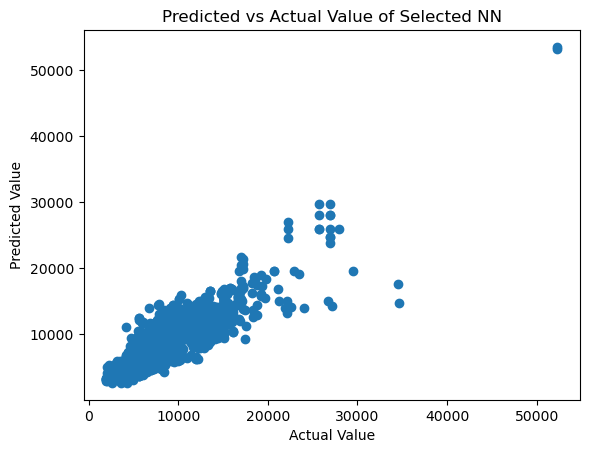

In [372]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Actual Value of Selected NN')
plt.show()